In [1]:
import pandas as pd
import numpy as np

In [2]:
water_data = pd.read_csv("data/water_potability.csv")
water_data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
# Replacing missing values with mean values
water_data_filled = water_data.fillna(water_data.mean())

# Checking if all missing values are filled
missing_values_filled = water_data_filled.isnull().sum()

missing_values_filled, water_data_filled.head()

(ph                 0
 Hardness           0
 Solids             0
 Chloramines        0
 Sulfate            0
 Conductivity       0
 Organic_carbon     0
 Trihalomethanes    0
 Turbidity          0
 Potability         0
 dtype: int64,
          ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
 0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
 1  3.716080  129.422921  18630.057858     6.635246  333.775777    592.885359   
 2  8.099124  224.236259  19909.541732     9.275884  333.775777    418.606213   
 3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
 4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   
 
    Organic_carbon  Trihalomethanes  Turbidity  Potability  
 0       10.379783        86.990970   2.963135           0  
 1       15.180013        56.329076   4.500656           0  
 2       16.868637        66.420093   3.055934           0  
 3       18.436524       100.3416

In [4]:
from sklearn.model_selection import train_test_split

# Separating the features and the target variable
X = water_data_filled.drop('Potability', axis=1)
y = water_data_filled['Potability']

# Splitting the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Checking the shapes of the splits
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


((2620, 9), (656, 9), (2620,), (656,))

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Creating the KNN classifier model
# We can start with n_neighbors=5, which is a common default value
knn_model = KNeighborsClassifier(n_neighbors=5)

# Training the model on the training dataset
knn_model.fit(X_train, y_train)

# Predicting the test set results
y_pred_knn = knn_model.predict(X_test)

# Calculating the accuracy and generating the classification report
accuracy_knn = accuracy_score(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print(class_report_knn)


              precision    recall  f1-score   support

           0       0.62      0.72      0.66       412
           1       0.34      0.25      0.29       244

    accuracy                           0.54       656
   macro avg       0.48      0.48      0.47       656
weighted avg       0.51      0.54      0.52       656



In [6]:
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Creating a new KNN model for GridSearch
knn = KNeighborsClassifier()

# Creating the GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5, verbose=1, n_jobs=-1)

# Fitting the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score


Fitting 5 folds for each of 42 candidates, totalling 210 fits


({'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'},
 0.5828244274809161)

              precision    recall  f1-score   support

           0       0.62      0.72      0.66       412
           1       0.34      0.25      0.29       244

    accuracy                           0.54       656
   macro avg       0.48      0.48      0.47       656
weighted avg       0.51      0.54      0.52       656



<Figure size 800x600 with 0 Axes>

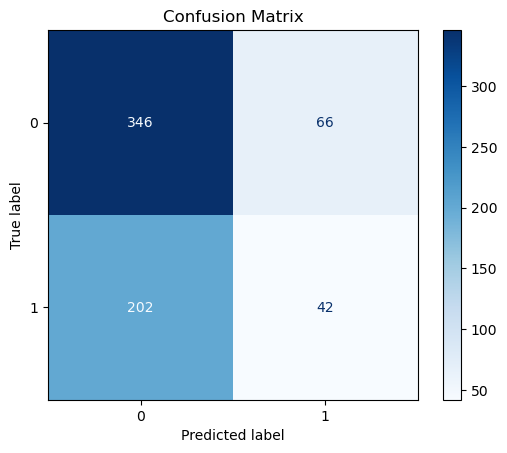

In [7]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

knn_best = grid_search.best_estimator_
knn_best.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = knn_best.predict(X_test)

# 혼동 행렬 생성 및 시각화
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred_knn))

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [9]:
from joblib import dump

dump(knn_best, 'model.joblib')

['model.joblib']